In [1]:
import pandas as pd
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from PIL import Image

In [2]:
data_dir = os.getcwd() + '\\all_images\\'

In [3]:
dest_dir = os.getcwd() + '\\reorganized\\'

In [4]:
skin_df = pd.read_csv('D:\PC\Machine_learning\HAM_CNN\HAM10000_metadata.csv')

In [5]:
skin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [6]:
skin_df.dx

0          bkl
1          bkl
2          bkl
3          bkl
4          bkl
         ...  
10010    akiec
10011    akiec
10012    akiec
10013    akiec
10014      mel
Name: dx, Length: 10015, dtype: object

In [7]:
print(skin_df['dx'].value_counts())

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64


In [8]:
label=skin_df['dx'].unique().tolist()  #Extract labels into a list
label_images = []

In [9]:
for i in label:
    os.mkdir(dest_dir + str(i) + "/")
    sample = skin_df[skin_df['dx'] == i]['image_id']
    label_images.extend(sample)
    for id in label_images:
        shutil.copyfile((data_dir + "/"+ id +".jpg"), (dest_dir + i + "/"+ id +".jpg"))
    label_images=[]  

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
datagen = ImageDataGenerator()

In [12]:
train_dir = os.getcwd() + "//reorganized//"

In [68]:
#USe flow_from_directory
train_data_keras = datagen.flow_from_directory(directory=train_dir,
                                         class_mode='categorical',
                                         batch_size=16,  #16 images at a time
                                         target_size=(32,32))  #Resize images

Found 10015 images belonging to 7 classes.


In [69]:
x, y = next(train_data_keras)

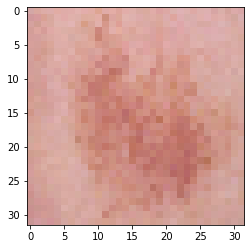

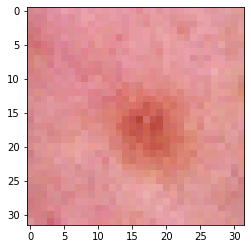

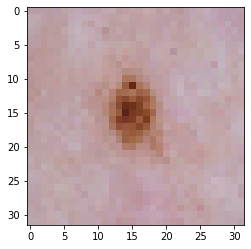

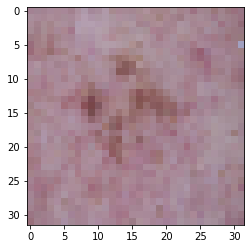

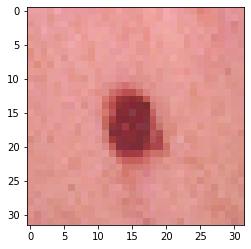

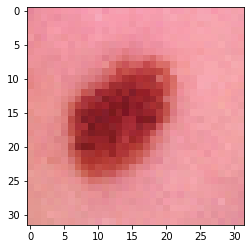

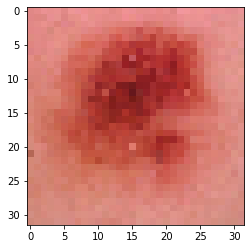

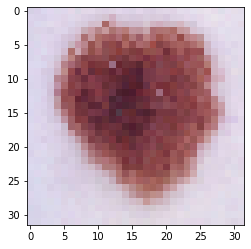

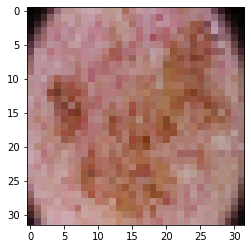

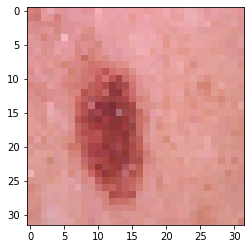

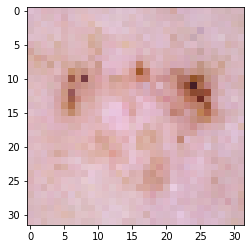

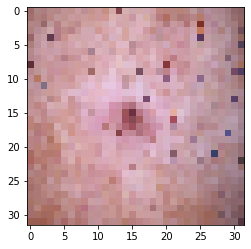

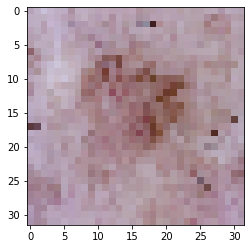

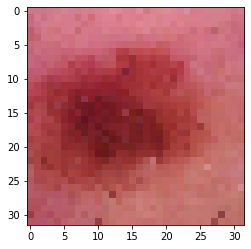

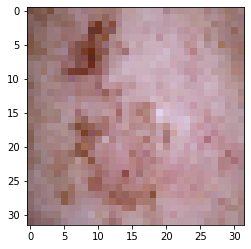

In [70]:
for i in range (0,15):
    image = x[i].astype(int)
    plt.imshow(image)
    plt.show()

In [71]:
SIZE = 32

In [72]:
# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])

LabelEncoder()

In [73]:
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [22]:
skin_df['label'] = le.transform(skin_df["dx"]) 

In [74]:
print(skin_df.head(5))

     lesion_id      image_id   dx dx_type   age   sex localization  label
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp      2
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp      2
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp      2
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp      2
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear      2


In [75]:
# Data distribution visualization
fig = plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

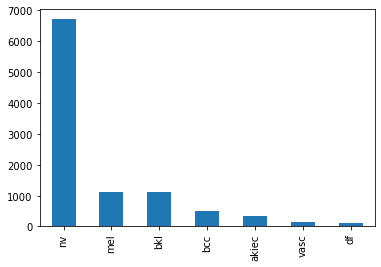

In [76]:
ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='bar')
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

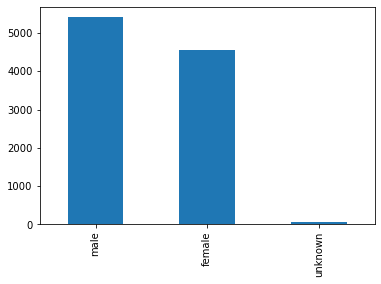

In [77]:
ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar')
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

Text(0.5, 1.0, 'Localization')

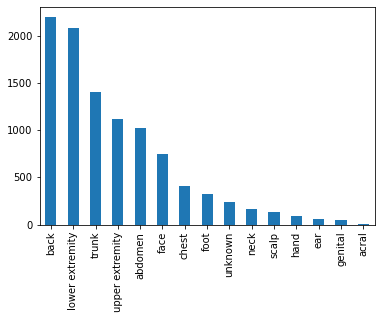

In [27]:
ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='bar')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')

In [28]:
from scipy import stats

c:\Users\MS.KHUONG\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age')

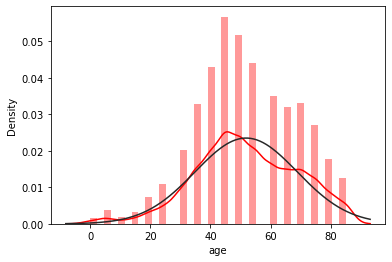

In [78]:
ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

In [79]:
np.random.seed(42)

In [80]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [81]:
df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]

In [82]:
n_samples=6705
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)

In [83]:
#Combined back to a single dataframe
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])

In [84]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())

0    6705
1    6705
2    6705
3    6705
4    6705
5    6705
6    6705
Name: label, dtype: int64


In [85]:
from glob import glob

In [86]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('reorganized/', '*', '*.jpg'))}

In [87]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [88]:
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,reorganized\akiec\ISIC_0026645.jpg
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,reorganized\akiec\ISIC_0025780.jpg
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,reorganized\akiec\ISIC_0024450.jpg
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,reorganized\akiec\ISIC_0027896.jpg
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,reorganized\akiec\ISIC_0029268.jpg
...,...,...,...,...,...,...,...,...,...
2346,HAM_0007614,ISIC_0029514,vasc,histo,55.0,female,face,6,reorganized\vasc\ISIC_0029514.jpg
2385,HAM_0004877,ISIC_0027159,vasc,histo,85.0,female,upper extremity,6,reorganized\vasc\ISIC_0027159.jpg
2456,HAM_0004862,ISIC_0032057,vasc,consensus,55.0,female,abdomen,6,reorganized\vasc\ISIC_0032057.jpg
2411,HAM_0007372,ISIC_0030283,vasc,consensus,55.0,male,trunk,6,reorganized\vasc\ISIC_0030283.jpg


In [89]:
#Use the path to read images.
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))

In [90]:
skin_df_balanced

,lesion_id,image_id,dx,dx_type,age,sex,localization,label,path,image
9789,HAM_0003136,ISIC_0026645,akiec,histo,65.0,male,back,0,reorganized\akiec\ISIC_0026645.jpg,"[[[155, 118, 107], [162, 126, 118], [174, 140,..."
9957,HAM_0006587,ISIC_0025780,akiec,histo,70.0,male,face,0,reorganized\akiec\ISIC_0025780.jpg,"[[[138, 76, 82], [131, 64, 68], [139, 73, 81],..."
9793,HAM_0005505,ISIC_0024450,akiec,histo,50.0,male,upper extremity,0,reorganized\akiec\ISIC_0024450.jpg,"[[[123, 86, 87], [174, 137, 137], [197, 161, 1..."
9758,HAM_0003455,ISIC_0027896,akiec,histo,75.0,male,hand,0,reorganized\akiec\ISIC_0027896.jpg,"[[[205, 149, 175], [207, 149, 169], [214, 158,..."
9875,HAM_0005459,ISIC_0029268,akiec,histo,85.0,male,upper extremity,0,reorganized\akiec\ISIC_0029268.jpg,"[[[203, 174, 199], [205, 174, 197], [206, 175,..."
...,...,...,...,...,...,...,...,...,...,...
2346,HAM_0007614,ISIC_0029514,vasc,histo,55.0,female,face,6,reorganized\vasc\ISIC_0029514.jpg,"[[[95, 77, 86], [150, 128, 142], [183, 154, 17..."
2385,HAM_0004877,ISIC_0027159,vasc,histo,85.0,female,upper extremity,6,reorganized\vasc\ISIC_0027159.jpg,"[[[239, 196, 196], [238, 194, 192], [238, 195,..."
2456,HAM_0004862,ISIC_0032057,vasc,consensus,55.0,female,abdomen,6,reorganized\vasc\ISIC_0032057.jpg,"[[[227, 158, 172], [230, 160, 173], [235, 169,..."
2411,HAM_0007372,ISIC_0030283,vasc,consensus,55.0,male,trunk,6,reorganized\vasc\ISIC_0030283.jpg,"[[[218, 160, 162], [219, 159, 162], [220, 156,..."


In [92]:
n_samples = 5  

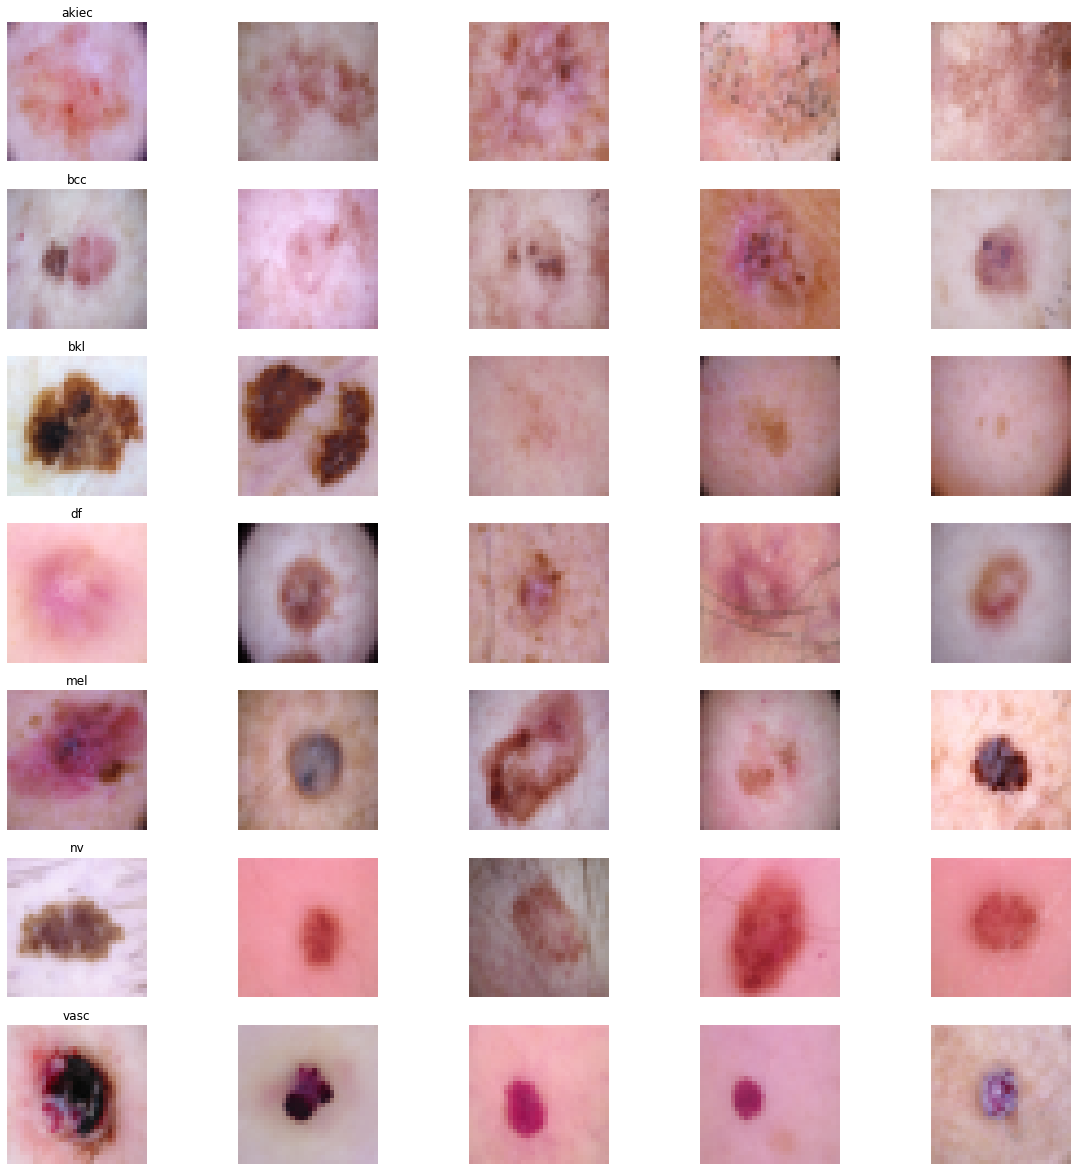

In [93]:
# Plotting
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [44]:
%pip install keras

Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [46]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [94]:
  # Scale values to 0-1. You can also used standardscaler or other scaling methods.
Y=skin_df_balanced['label']  #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem

In [95]:
Y_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [96]:
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255.

In [97]:
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.25, random_state=42)

In [98]:
num_classes = 7

In [99]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.metrics import confusion_matrix

In [100]:
model = Sequential()


In [101]:
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

In [102]:
model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

In [103]:
model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

In [104]:
model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 256)      0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 15, 15, 256)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       295040    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 6, 6, 128)        

In [105]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])

In [106]:
batch_size = 16
epochs = 10

In [107]:
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/10
2201/2201 - 181s - loss: 1.4452 - acc: 0.4136 - val_loss: 1.1381 - val_acc: 0.5421 - 181s/epoch - 82ms/step
Epoch 2/10
2201/2201 - 188s - loss: 1.1157 - acc: 0.5617 - val_loss: 0.9263 - val_acc: 0.6631 - 188s/epoch - 85ms/step
Epoch 3/10
2201/2201 - 190s - loss: 0.9708 - acc: 0.6267 - val_loss: 0.8018 - val_acc: 0.7159 - 190s/epoch - 87ms/step
Epoch 4/10
2201/2201 - 192s - loss: 0.8799 - acc: 0.6643 - val_loss: 0.7108 - val_acc: 0.7353 - 192s/epoch - 87ms/step
Epoch 5/10
2201/2201 - 189s - loss: 0.8118 - acc: 0.6881 - val_loss: 0.6430 - val_acc: 0.7505 - 189s/epoch - 86ms/step
Epoch 6/10
2201/2201 - 189s - loss: 0.7584 - acc: 0.7103 - val_loss: 0.5885 - val_acc: 0.7837 - 189s/epoch - 86ms/step
Epoch 7/10
2201/2201 - 190s - loss: 0.7206 - acc: 0.7254 - val_loss: 0.5830 - val_acc: 0.7885 - 190s/epoch - 86ms/step
Epoch 8/10
2201/2201 - 189s - loss: 0.6966 - acc: 0.7353 - val_loss: 0.5359 - val_acc: 0.8237 - 189s/epoch - 86ms/step
Epoch 9/10
2201/2201 - 190s - loss: 0.6697 - acc

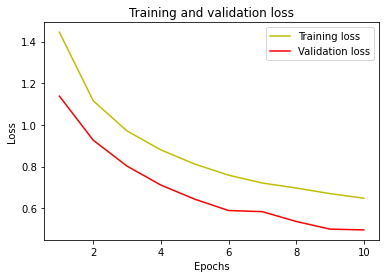

In [108]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


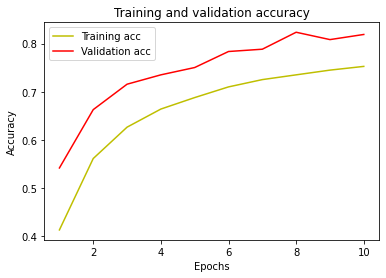

In [109]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [110]:
batch_size1 = 16 
epochs1 = 30

In [111]:
history1 = model.fit(
    x_train, y_train,
    epochs=epochs1,
    batch_size = batch_size1,
    validation_data=(x_test, y_test),
    verbose=2)

Epoch 1/30
2201/2201 - 187s - loss: 0.6266 - acc: 0.7640 - val_loss: 0.4426 - val_acc: 0.8467 - 187s/epoch - 85ms/step
Epoch 2/30
2201/2201 - 190s - loss: 0.6091 - acc: 0.7713 - val_loss: 0.4336 - val_acc: 0.8427 - 190s/epoch - 86ms/step
Epoch 3/30
2201/2201 - 190s - loss: 0.5949 - acc: 0.7746 - val_loss: 0.4306 - val_acc: 0.8528 - 190s/epoch - 86ms/step
Epoch 4/30
2201/2201 - 183s - loss: 0.5796 - acc: 0.7803 - val_loss: 0.3870 - val_acc: 0.8683 - 183s/epoch - 83ms/step
Epoch 5/30
2201/2201 - 182s - loss: 0.5540 - acc: 0.7910 - val_loss: 0.4008 - val_acc: 0.8567 - 182s/epoch - 83ms/step
Epoch 6/30
2201/2201 - 190s - loss: 0.5532 - acc: 0.7912 - val_loss: 0.3780 - val_acc: 0.8740 - 190s/epoch - 86ms/step
Epoch 7/30
2201/2201 - 189s - loss: 0.5439 - acc: 0.7944 - val_loss: 0.3711 - val_acc: 0.8653 - 189s/epoch - 86ms/step
Epoch 8/30
2201/2201 - 190s - loss: 0.5336 - acc: 0.7994 - val_loss: 0.3847 - val_acc: 0.8612 - 190s/epoch - 86ms/step
Epoch 9/30
2201/2201 - 190s - loss: 0.5260 - acc

In [130]:
score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

367/367 [==============================] - 11s 31ms/step - loss: 0.2544 - acc: 0.9103
Test accuracy: 0.9103460311889648


In [131]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 

367/367 [==============================] - 12s 31ms/step


In [132]:
y_true

array([3, 5, 5, ..., 3, 0, 0], dtype=int64)

In [133]:
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

In [134]:
cm

array([[1699,    8,   11,    0,    0,    0,    0],
       [   9, 1597,   20,    8,    3,    0,    0],
       [  48,   32, 1526,    5,   35,   12,    0],
       [   0,    0,    0, 1674,    0,    0,    0],
       [  19,    6,  229,    6, 1404,   74,    0],
       [  12,   33,  263,   14,  197, 1069,    8],
       [   0,    0,    0,    0,    0,    0, 1713]], dtype=int64)

<AxesSubplot:>

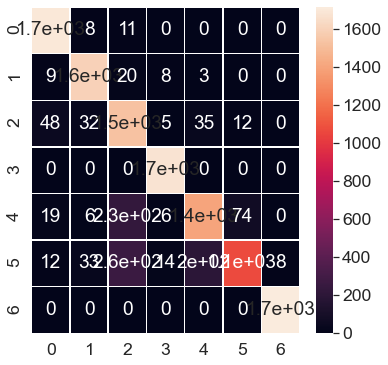

In [135]:
fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, linewidths=.5, ax=ax)

Text(0, 0.5, 'Fraction of incorrect predictions')

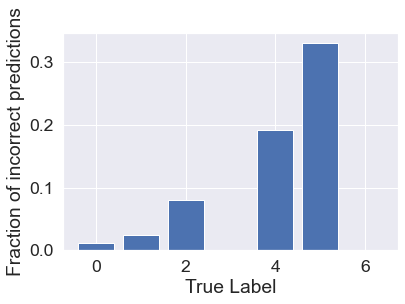

In [136]:
#PLot fractional incorrect misclassifications
incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)
plt.bar(np.arange(7), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')

Dự đoán

In [137]:
CATEGORIES = ['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']

In [138]:
import cv2

In [139]:

def image(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img, (SIZE, SIZE))
    new_arr = np.array(new_arr)
    final_image = np.expand_dims(new_arr,axis=0)
    final_image = final_image/255
    return final_image

In [140]:
img2 = image(r'D:\PC\Machine_learning\HAM_CNN\image_test\ung-thu-da-la-gi.jpg')

In [141]:
prediction = model.predict(img2)

1/1 [==============================] - 0s 21ms/step


In [144]:
prediction

array([[1.1989364e-08, 3.5215259e-01, 1.5334734e-01, 5.1368185e-04,
        5.6361392e-02, 3.5430497e-01, 8.3319977e-02]], dtype=float32)

In [142]:
print('Dấu hiệu : '+ CATEGORIES [prediction.argmax()])
print('Độ chính xác là : '+ str (np.amax(prediction)))

Dấu hiệu : nv
Độ chính xác là : 0.35430497


In [143]:
model.save ('HAM_Cnn.h5')